<a href="https://colab.research.google.com/github/Tamara-Nahapetyan/Regression/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('data.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


<ipython-input-172-5182bcd5d282>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


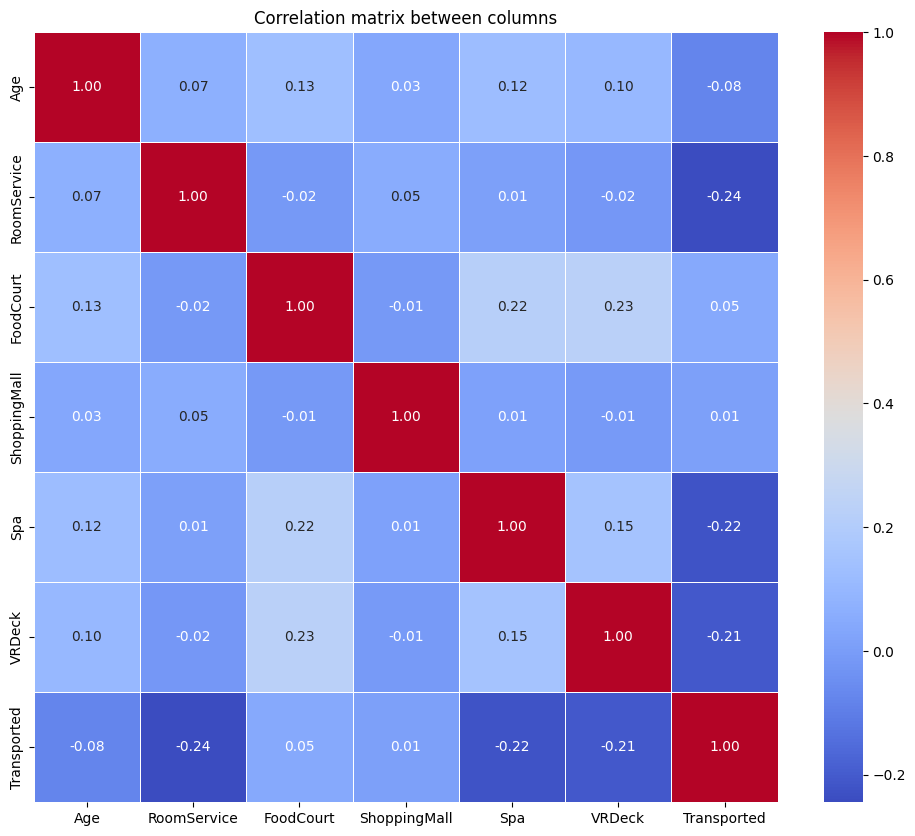

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = .5)
plt.title('Correlation matrix between columns')
plt.show()

In [ ]:
df.shape

(8693, 14)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.Transported.unique()

array([False,  True])

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Transported'])
df = one_hot_encoded_data
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported_False,Transported_True
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,1,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,1,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,0,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,1,0


In [ ]:
df.HomePlanet .unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
df.HomePlanet .value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
df['HomePlanet'].fillna(df['HomePlanet'].mode(), inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported_False,Transported_True
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,1,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,1,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,0,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,1,0


In [ ]:
df.CryoSleep .unique()
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [ ]:
df['CryoSleep'].fillna(df['CryoSleep'].mode(), inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported_False,Transported_True
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,1,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,1,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,0,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,1,0


In [ ]:
df['Cabin'].fillna(df['Cabin'].mode(), inplace=True)

In [ ]:
df.Destination .unique()
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
df['Destination'].fillna(df['Destination'].mode(), inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df['VIP'].fillna(df['VIP'].mode(), inplace=True)

In [ ]:
df.FoodCourt .unique()
df.FoodCourt.value_counts()

0.000000       5456
458.077203      183
1.000000        116
2.000000         75
3.000000         53
               ... 
3846.000000       1
5193.000000       1
312.000000        1
827.000000        1
4688.000000       1
Name: FoodCourt, Length: 1508, dtype: int64

In [ ]:
df['RoomService'].fillna(df['RoomService'].mean(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)
df['Spa'].fillna(df['Spa'].mean(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mode(), inplace=True)

Text(0.5, 1.0, 'Distribution of Age')

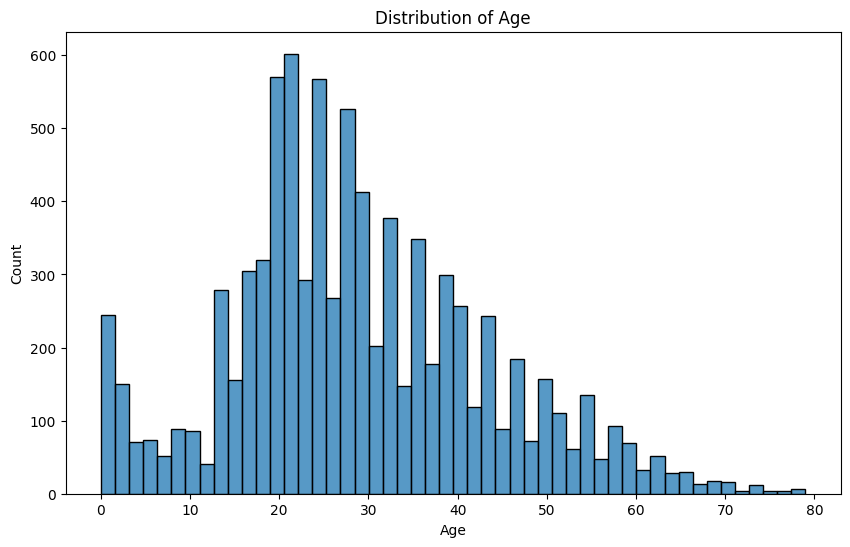

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=50)
plt.title('Distribution of Age')

<ipython-input-25-e120a74a7b04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transported_True',data=df, palette='Set2')


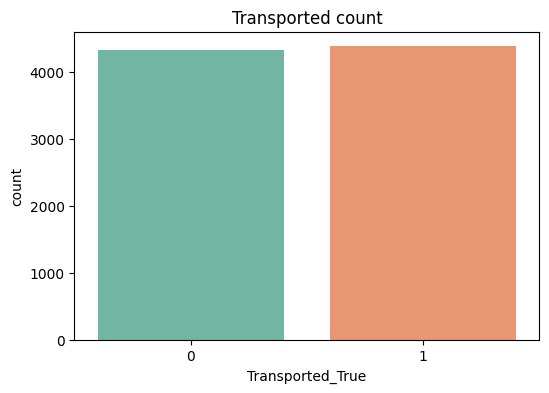

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Transported_True',data=df, palette='Set2')
plt.title('Transported count');

<ipython-input-26-66c91e1ab9df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transported_False',data=df, palette='Set2')


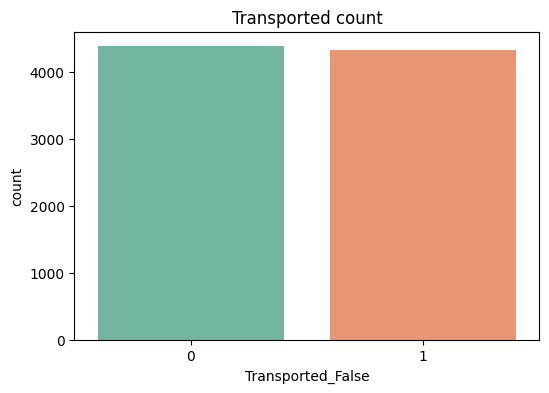

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Transported_False',data=df, palette='Set2')
plt.title('Transported count');

<ipython-input-27-d0a30caf9412>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HomePlanet',data=df, palette='Set2')


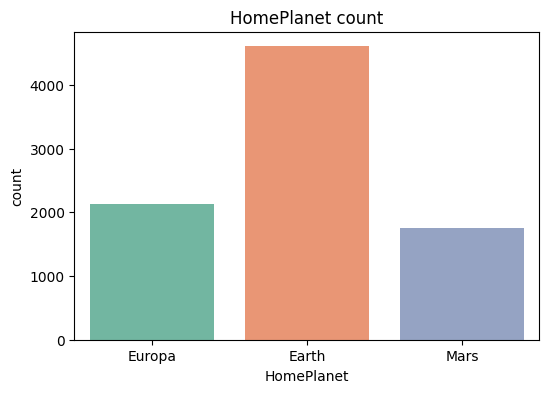

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='HomePlanet',data=df, palette='Set2')
plt.title('HomePlanet count');

<ipython-input-28-efdfb5a4aa49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CryoSleep',data=df, palette='Set2')


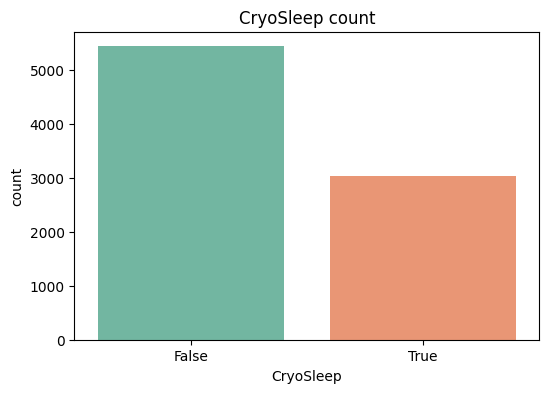

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='CryoSleep',data=df, palette='Set2')
plt.title('CryoSleep count');

In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported_False', 'Transported_True'],
      dtype='object')

<ipython-input-30-99767e129f08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cabin',data=df, palette='Set2')


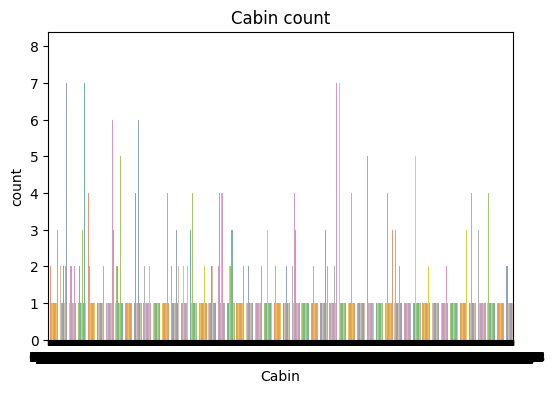

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Cabin',data=df, palette='Set2')
plt.title('Cabin count');

In [ ]:
categorical_cols = ['HomePlanet', 'Cabin', 'Destination', 'Name']
bool_cols = ['CryoSleep', 'VIP',]
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported_True', 'Transported_False']

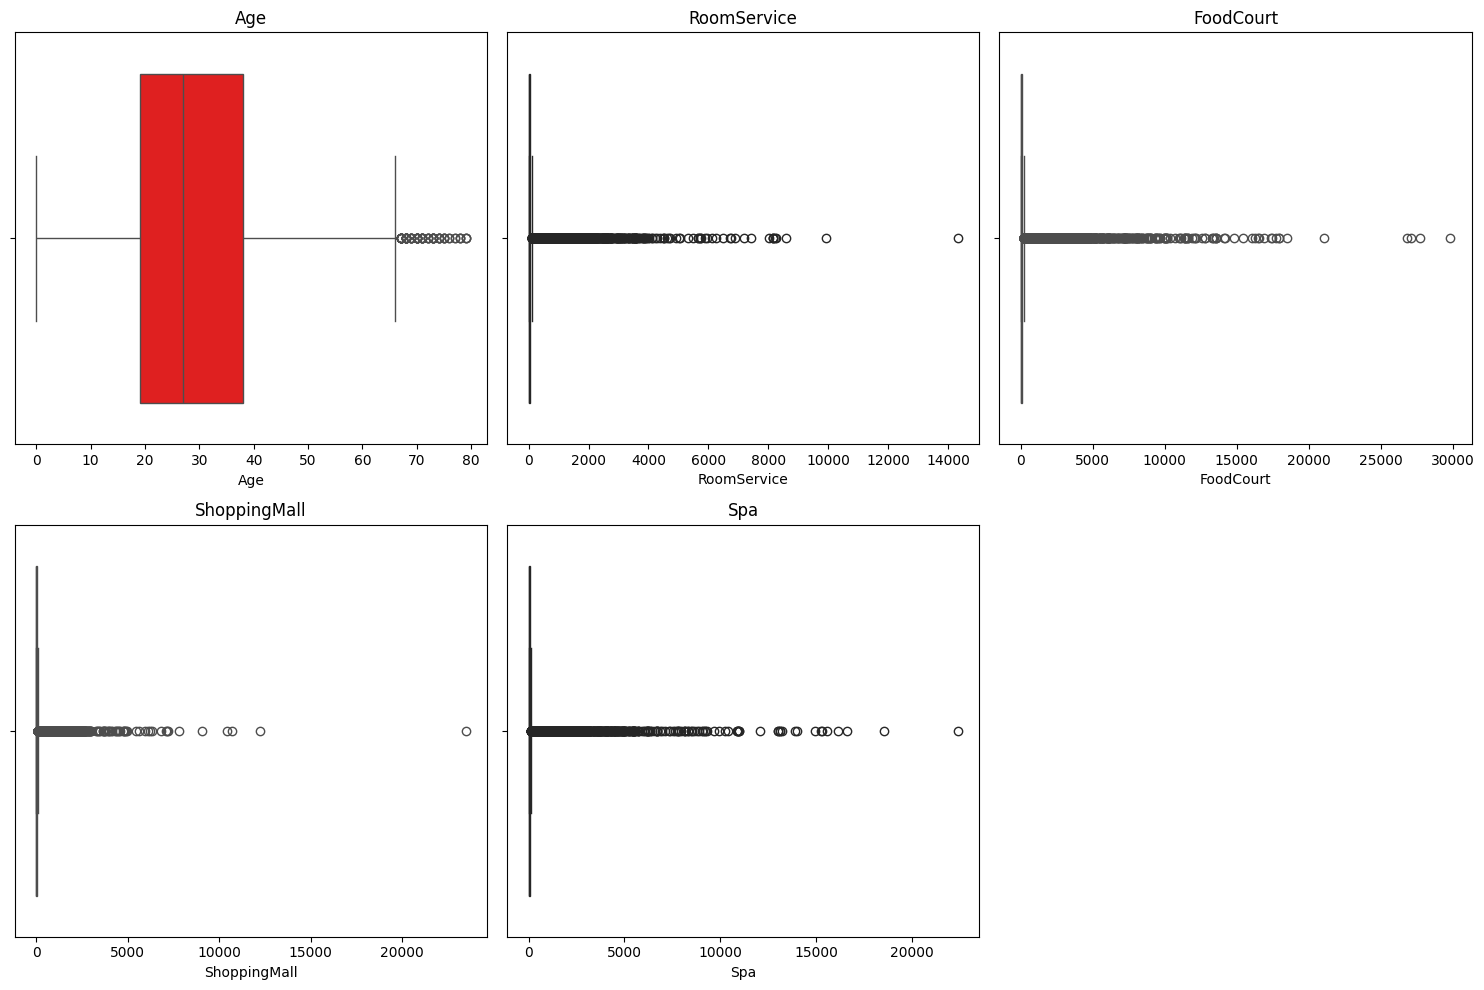

In [ ]:
plt.figure(figsize=(15, 10))
colors = ['red', 'green', 'blue', 'orange', 'purple']
selected_cols = numeric_cols[:len(colors)]
for i, col in enumerate(selected_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5
outliers = (df[numeric_cols] < (Q1 - outlier_threshold * IQR)) | (df[numeric_cols] > (Q3 + outlier_threshold * IQR))
column_medians = df[numeric_cols].median()
df.loc[outliers.any(axis=1), numeric_cols] = column_medians.values
print("Cleaned DataFrame:")
print(df)

Cleaned DataFrame:
     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  27.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  27.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  27.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  27.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  27.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  27.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  27.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  27.0  False   

      RoomService  FoodCourt  Sh

In [ ]:
replacement_value = 'other'
for col in categorical_cols:
    freq_counts = df[col].value_counts()
    outliers_categorical = freq_counts[freq_counts < 2].index
    df[col] = df[col].replace(outliers_categorical, replacement_value)
print("Cleaned DataFrame:")
print(df)

Cleaned DataFrame:
     PassengerId HomePlanet CryoSleep    Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False    other    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False    other    TRAPPIST-1e  27.0  False   
2        0003_01     Europa     False    A/0/S    TRAPPIST-1e  27.0   True   
3        0003_02     Europa     False    A/0/S    TRAPPIST-1e  27.0  False   
4        0004_01      Earth     False    other    TRAPPIST-1e  27.0  False   
...          ...        ...       ...      ...            ...   ...    ...   
8688     9276_01     Europa     False    other    55 Cancri e  27.0   True   
8689     9278_01      Earth      True    other  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False    other    TRAPPIST-1e  27.0  False   
8691     9280_01     Europa     False  E/608/S    55 Cancri e  27.0  False   
8692     9280_02     Europa     False  E/608/S    TRAPPIST-1e  27.0  False   

      RoomService  FoodCourt  ShoppingMall  

In [ ]:
x = df.drop(['Transported_False','Transported_True'], axis=1)
y = df[['Transported_True']]
le = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object' or x[col].dtype == 'category':
        x[col] = le.fit_transform(x[col])
x

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,5252
1,1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,4502
2,2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,457
3,3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,7149
4,4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,8319
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,3524
8689,8689,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,4780
8690,8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,3002
8691,8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,1596


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)
y_pred = clf.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7246932515337423


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_imputed, y_train)
y_pred = clf.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

<ipython-input-42-c45c679f1535>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_imputed, y_train)


Accuracy: 0.7933282208588958


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_imputed, y_train)
y_pred = knn_classifier.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test Accuracy: 0.7055214723926381


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
clf = LogisticRegression(random_state=42)
clf.fit(X_train_imputed, y_train)
y_pred = clf.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7603527607361963


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


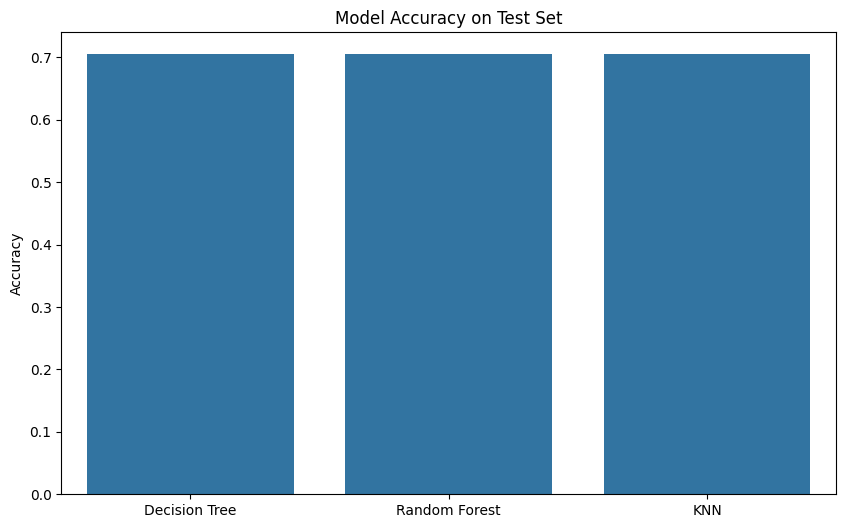

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_log = accuracy_score(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.barplot(x=['Decision Tree', 'Random Forest', 'KNN'],
            y=[accuracy_dt, accuracy_rf, accuracy_knn])
plt.title('Model Accuracy on Test Set')
plt.ylabel('Accuracy')
plt.show()

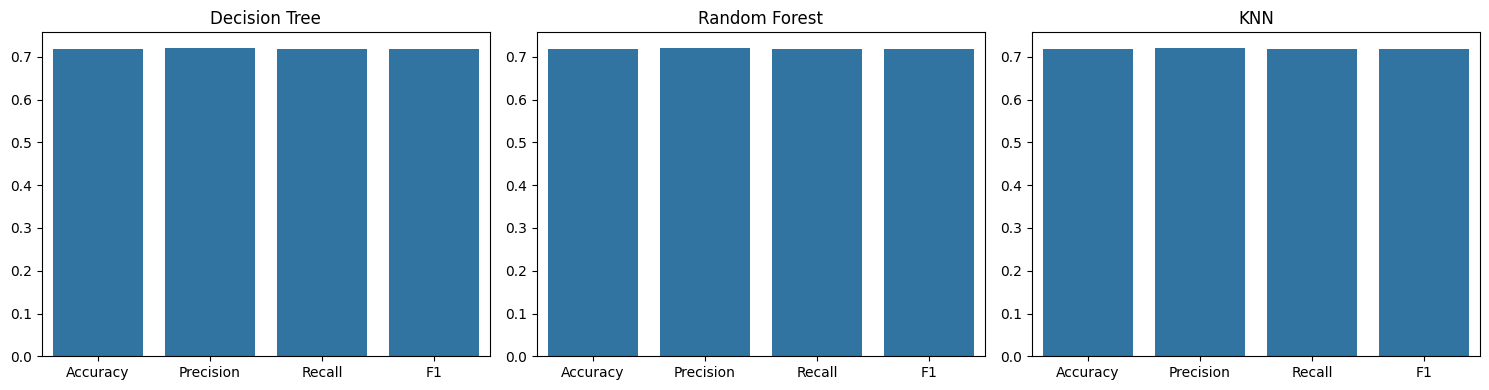

In [ ]:
plt.figure(figsize=(15, 4))

# Decision Tree
plt.subplot(1, 3, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'],
            y=[accuracy_score(y_test, y_pred),
               precision_score(y_test, y_pred, average='weighted'),
               recall_score(y_test, y_pred, average='weighted'),
               f1_score(y_test, y_pred, average='weighted')])
plt.title('Decision Tree')

# Random Forest
plt.subplot(1, 3, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'],
            y=[accuracy_score(y_test, y_pred),
               precision_score(y_test, y_pred, average='weighted'),
               recall_score(y_test, y_pred, average='weighted'),
               f1_score(y_test, y_pred, average='weighted')])
plt.title('Random Forest')

# KNN
plt.subplot(1, 3, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'],
            y=[accuracy_score(y_test, y_pred),
               precision_score(y_test, y_pred, average='weighted'),
               recall_score(y_test, y_pred, average='weighted'),
               f1_score(y_test, y_pred, average='weighted')])
plt.title('KNN')

plt.tight_layout()
plt.show()